# Working with large data set

In this workshop, we will use real data imported from csv file (boston.csv) instead of made-up ones

In [1]:
# import everything we need
import numpy as np
import pandas as pd

In [2]:
''' 
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''

" \nVariables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by town\n B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n LSTAT    % lower status of the population\n MEDV     Median value of owner-occupied homes in $1000's\n "

### Construct a dataframe for our data and target for a better illustration
### set the columns names according to the result above and show the first 5 rows

In [3]:
# Load the Boston housing dataset from CSV
df = pd.read_csv('boston.csv', index_col=0)

# Display first few rows
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())


Dataset shape: (506, 14)

First 5 rows:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [4]:
# Select features (X) and target (y)
# Using the first two features: CRIM and ZN
X = df[['CRIM', 'ZN']].values
y = df['MEDV'].values

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (506, 2)
y shape: (506,)


In [5]:
# Construct a dataframe for our data and target for a better illustration
# set the columns names according to the result above


# Create a DataFrame for the features
X = pd.DataFrame(data=X, columns=['Feature 1', 'Feature 2'])

# Create a DataFrame for the target
y = pd.DataFrame(data=y, columns=['Target'])

display(X)
display(y)


,Feature 1,Feature 2
0,0.00632,18.0
1,0.02731,0.0
2,0.02729,0.0
3,0.03237,0.0
4,0.06905,0.0
...,...,...
501,0.06263,0.0
502,0.04527,0.0
503,0.06076,0.0
504,0.10959,0.0


,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## Model Training

In [6]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
# notice that we need double square brackets to select X
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X_subset = X[['Feature 1', 'Feature 2']]
y_subset = y[['Target']]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

In [8]:
# Convert to 2D numpy arrays for model training
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [9]:
# instantiate a linear regression model
# train the model to fit the training data, finding the coef and intercept


model = LinearRegression()

# train the model to fit the training data, finding the coef and intercept
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Prediction

Now that we've trained our model, the next step is to predict the data.

Steps:

    Get predictions, 𝑦̂, using LinearRegression.predict()


In [10]:
# make predictions on the training data
y_pred_train = model.predict(X_train)
# the first 5 predicted values
print("First 5 predicted values:", '\n', y_pred_train[:5])

# make predictions on the test data
y_pred_test = model.predict(X_test)
# the first 5 predicted values on test data
print("First 5 predicted values on test data:",'\n', y_pred_test[:5])


First 5 predicted values: 
 [[17.68016106]
 [22.70063961]
 [26.34326623]
 [20.46066587]
 [22.66632001]]
First 5 predicted values on test data: 
 [[22.88742877]
 [26.82651599]
 [22.88256034]
 [22.88747759]
 [21.14428537]]


# Model Validation

We want to see how well our model fits the data. r2-score should be as close to 1 as possible

In [11]:
# we can see the coefficient and intercept our model finds
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [[-0.34874097  0.09816907]]
Intercept: [22.91943621]


As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
We can visualize it to see what the model looks like

Text(0.5, 0, 'Target')

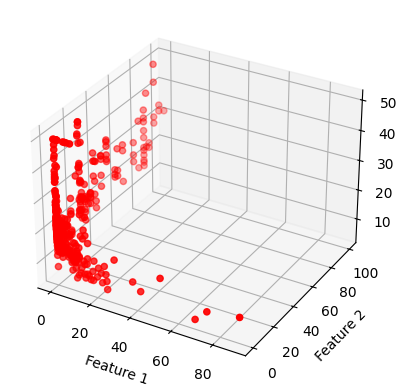

In [12]:
# As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
# We can visualize it to see what the model looks like
import matplotlib.pyplot as plt
# 2d plot is not sufficient here as we have 2 features
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train.flatten(), c='r', marker='o')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')

Plot the regression line (blue) vs the actual value (red)

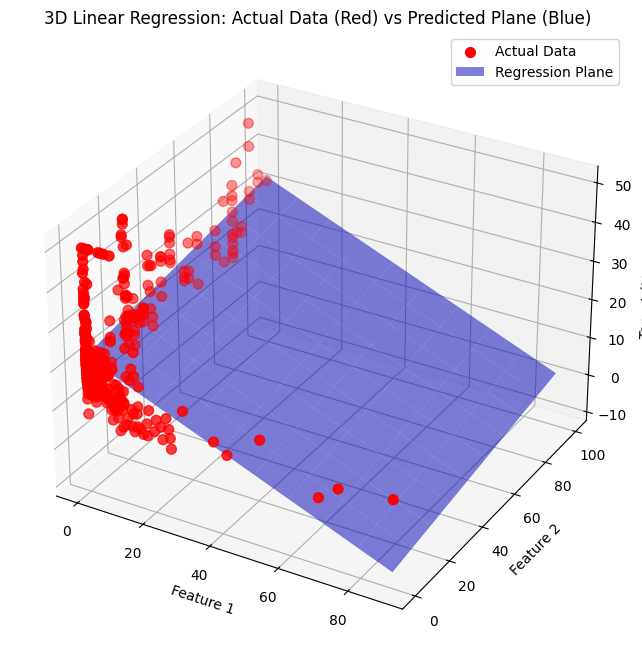

R2-score (Training): 0.20144089223453754
R2-score (Test): 0.3562670500149284


In [15]:
# We want to plot the regression line(blue) vs the actual value(red)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure for the regression plane visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points (red)
ax.scatter(X_train[:, 0], X_train[:, 1], y_train.flatten(), c='r', marker='o', s=50, label='Actual Data')

# Create a meshgrid for the two features
x1_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 10)
x2_range = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 10)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Calculate the corresponding predicted y values
y_mesh = (model.coef_[0][0] * x1_mesh + model.coef_[0][1] * x2_mesh + model.intercept_[0])

# Plot the regression plane (blue)
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, color='b', alpha=0.5, label='Regression Plane')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target (MEDV)')
ax.set_title('3D Linear Regression: Actual Data (Red) vs Predicted Plane (Blue)')
plt.legend()
plt.show()

# evaluate the model using r2-score
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("R2-score (Training):", r2_train)
print("R2-score (Test):", r2_test)

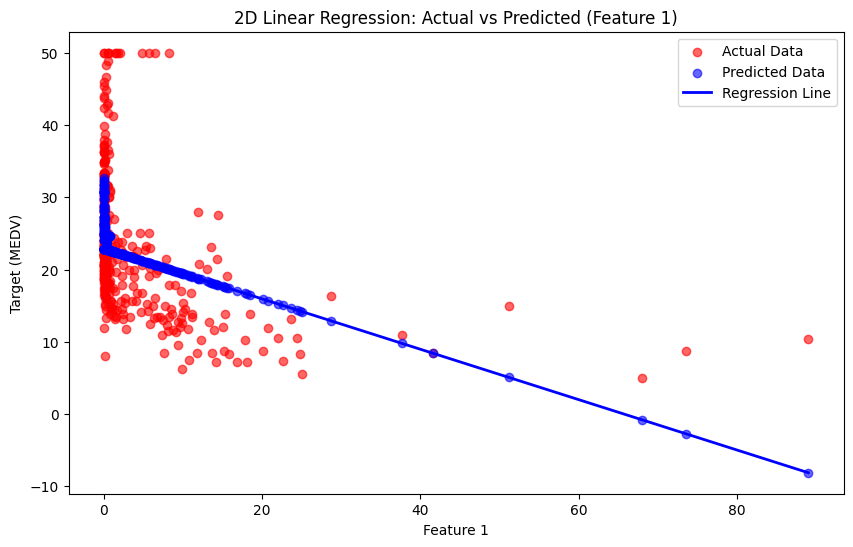

In [ ]:
# plot the 2D visualization of the regression line vs actual values for only feature 1
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], y_train, color='red', label='Actual Data', alpha=0.6)
plt.scatter(X_train[:, 0], y_pred_train, color='blue', label='Predicted Data', alpha=0.6)

# Create a solid line for the regression fit
sorted_indices = np.argsort(X_train[:, 0])
plt.plot(X_train[sorted_indices, 0], y_pred_train[sorted_indices], color='blue', linewidth=2, label='Regression Line')

plt.xlabel('Feature 1')
plt.ylabel('Target (MEDV)')
plt.title('2D Linear Regression: Actual vs Predicted (Feature 1)')
plt.legend()
plt.show()

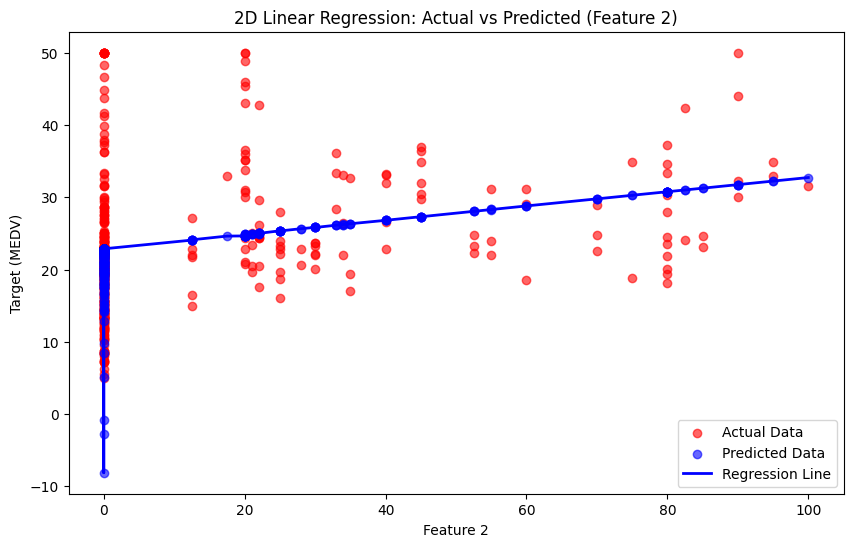

In [18]:
# plot the 2D visualization of the regression line vs actual values for only feature 2
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 1], y_train, color='red', label='Actual Data', alpha=0.6)
plt.scatter(X_train[:, 1], y_pred_train, color='blue', label='Predicted Data', alpha=0.6)

# Create a solid line for the regression fit
sorted_indices = np.argsort(X_train[:, 1])
plt.plot(X_train[sorted_indices, 1], y_pred_train[sorted_indices], color='blue', linewidth=2, label='Regression Line')

plt.xlabel('Feature 2')
plt.ylabel('Target (MEDV)')
plt.title('2D Linear Regression: Actual vs Predicted (Feature 2)')
plt.legend()
plt.show()